In [5]:
pip install sklearn matplotlib

     |████████████████████████████████| 7.2 MB 7.0 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.1-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.8 MB 10.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = 'data'
! ls {data_path}

09_prepared.pkl.bz2 10_prepared.pkl.bz2 11_prepared.pkl.bz2


In [13]:
# use partial dataset because lacking resources
filenames = ['09_prepared.pkl.bz2'] #,'10_prepared.pkl.bz2','11_prepared.pkl.bz2']
dfs = []
for fn in filenames:
    path = Path(data_path).joinpath(fn).resolve()
    print(f'loading path: {path}')
    with bz2.open(path, 'rb') as f:
        dfs.append(pickle.load(f))
df = pd.concat(dfs)
df

loading path: /Users/kamil/ui/stds/inno_stats_2020/data/09_prepared.pkl.bz2


,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341
...,...,...,...,...,...,...,...,...,...,...,...
42100853,2020-09-30 11:26:28,350DE9C7-F602-EB11-B444-005056A7539A,0,A465340,25292,17528,1.0,130.00,False,1739990,4850561
42100854,2020-09-30 08:12:39,6D7ACBFB-DB02-EB11-B444-005056A7539A,0,A698682,30740,19188,2.0,120.00,False,1761351,10015419
42100855,2020-09-30 09:54:24,F96D45E8-E902-EB11-B444-005056A7539A,0,7790662,30741,19188,1.0,73.00,False,1432778,22816791
42100856,2020-09-30 12:00:04,12067064-FB02-EB11-B444-005056A7539A,0,2751739,34835,15916,1.0,78.00,False,484390,1648929


In [14]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,8.446032e+05,1.170384e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.388947e+05,6.760102e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,3.650470e+05,5.848724e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,8.150010e+05,1.170182e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.288708e+06,1.755596e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


In [15]:
df['day'] = df['date'].dt.date
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228,2020-09-01
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113,2020-09-01
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899,2020-09-01
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283,2020-09-01
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341,2020-09-01


In [16]:
df_ = df[['id_card_int', 'quantity', 'sum', 'is_green']]
df_

,id_card_int,quantity,sum,is_green
0,1538855,1.0,108.00,False
1,267307,1.0,108.00,False
2,610220,1.0,107.95,False
3,441497,1.0,108.00,False
4,1065358,2.0,88.00,False
...,...,...,...,...
42100853,1739990,1.0,130.00,False
42100854,1761351,2.0,120.00,False
42100855,1432778,1.0,73.00,False
42100856,484390,1.0,78.00,False


<AxesSubplot:>

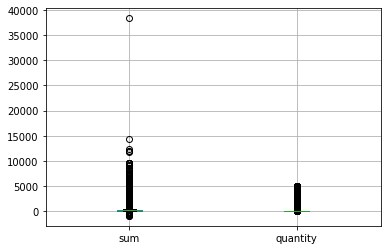

In [17]:
df_[['sum', 'quantity']].boxplot()

In [20]:
df_ = df_[(df_['sum']>0) & (df_['quantity']>0)]

In [21]:
df_

,id_card_int,quantity,sum,is_green
0,1538855,1.0,108.00,False
1,267307,1.0,108.00,False
2,610220,1.0,107.95,False
3,441497,1.0,108.00,False
4,1065358,2.0,88.00,False
...,...,...,...,...
42100853,1739990,1.0,130.00,False
42100854,1761351,2.0,120.00,False
42100855,1432778,1.0,73.00,False
42100856,484390,1.0,78.00,False


<AxesSubplot:>

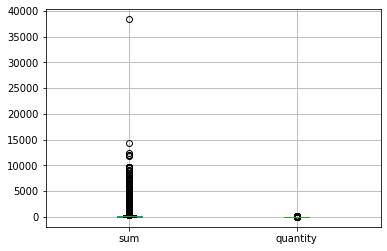

In [23]:
df_[['sum', 'quantity']].boxplot()

<AxesSubplot:>

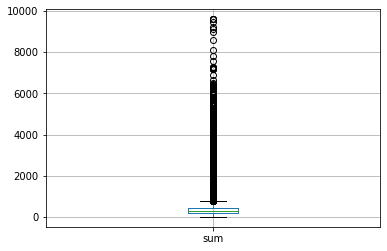

In [25]:
sum_maxs = df_[['id_card_int', 'sum']].groupby('id_card_int').max()
sum_maxs.boxplot()

<AxesSubplot:>

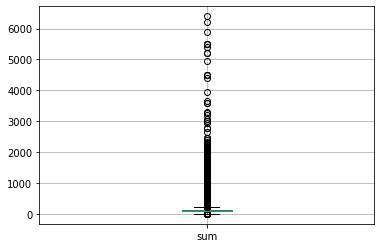

In [26]:
sum_means = df_[['id_card_int', 'sum']].groupby('id_card_int').mean()
sum_means.boxplot()

<AxesSubplot:>

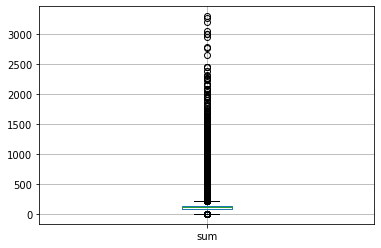

In [27]:
sum_means=sum_means[sum_means['sum']<3500]
sum_means.boxplot()

<AxesSubplot:>

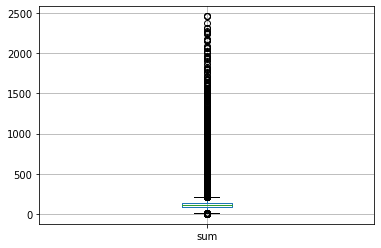

In [28]:
sum_means=sum_means[sum_means['sum']<2500]
sum_means.boxplot()

In [32]:
t = sum_means.sort_values('sum', ascending=False)
t.reset_index()
t

,sum
id_card_int,
1844700,2460.000000
516530,2460.000000
953959,2459.600000
1095067,2380.000000
555480,2315.170000
...,...
921146,0.700000
1744607,0.516190
1634071,0.484500
